In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from sklearn.impute import SimpleImputer
import math
sns.set()

In [2]:
df = pd.read_csv('Cardetails.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [3]:
df.shape

(8128, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [5]:
df.apply(pd.isnull).sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [6]:
df['mileage'] = df['mileage'].str.replace(' kmpl', '')

In [7]:
df['mileage'] = df['mileage'].str.replace(' km/kg', '')

In [8]:
df['mileage'] = pd.to_numeric(df['mileage'])

In [9]:
df['engine'] = df['engine'].str.replace(' CC', '')

In [10]:
df['engine'] = pd.to_numeric(df['engine'])

In [11]:
df['max_power'] = df['max_power'].str.replace(' bhp', '')

In [12]:
df['max_power'] = pd.to_numeric(df['max_power'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   float64
 9   engine         7907 non-null   float64
 10  max_power      7912 non-null   float64
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(4), int64(3), object(6)
memory usage: 825.6+ KB


In [14]:
y = df['selling_price']

In [15]:
x1 = df['year']
x2 = df['km_driven']
x3 = df['mileage']
x4 = df['engine']
x5 = df['max_power']
x6 = df['seats']

### The first condition in creating a regression model is that all the features we use for the regression model have a linear relationship with the dependent variable (y). To check this issue, we draw a scatter plot for each attribute with the dependent variable.

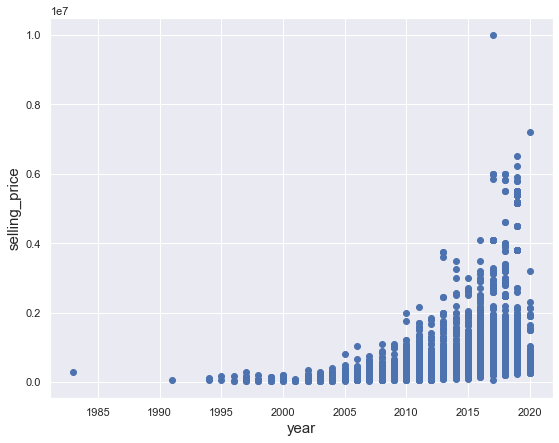

In [16]:
plt.figure(figsize = (9, 7))
plt.scatter(x1, y)
plt.xlabel('year', fontsize = 15)
plt.ylabel('selling_price', fontsize = 15)
plt.show()

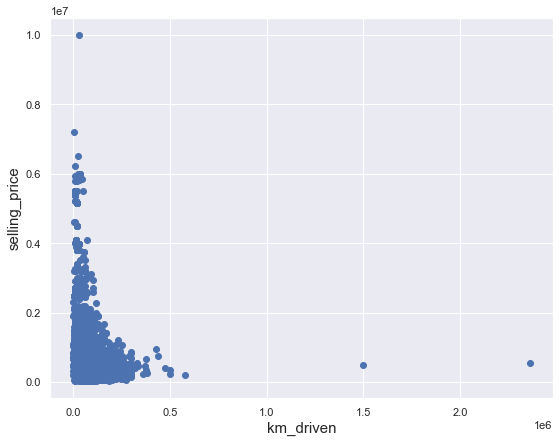

In [17]:
plt.figure(figsize = (9, 7))
plt.scatter(x2, y)
plt.xlabel('km_driven', fontsize = 15)
plt.ylabel('selling_price', fontsize = 15)
plt.show()

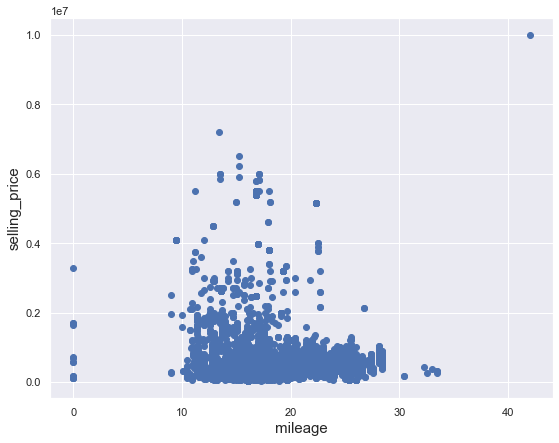

In [18]:
plt.figure(figsize = (9, 7))
plt.scatter(x3, y)
plt.xlabel('mileage', fontsize = 15)
plt.ylabel('selling_price', fontsize = 15)
plt.show()

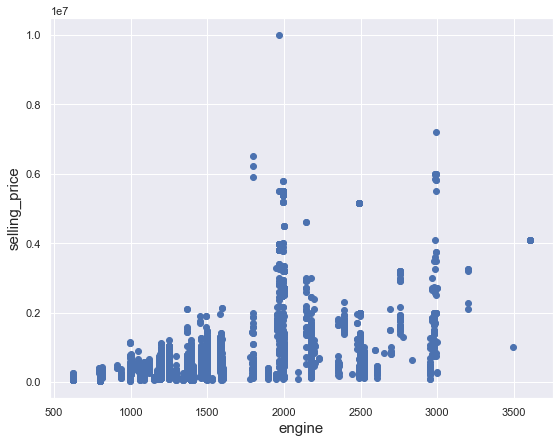

In [19]:
plt.figure(figsize = (9, 7))
plt.scatter(x4, y)
plt.xlabel('engine', fontsize = 15)
plt.ylabel('selling_price', fontsize = 15)
plt.show()

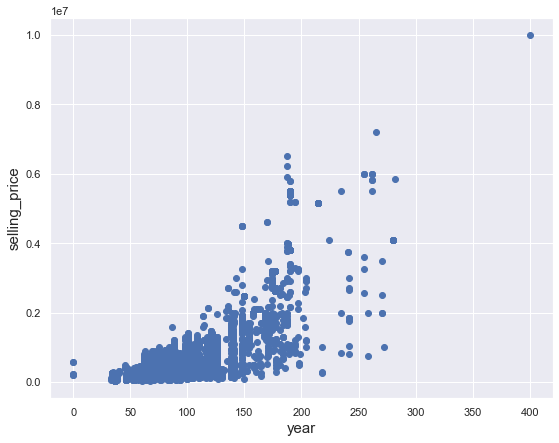

In [20]:
plt.figure(figsize = (9, 7))
plt.scatter(x5, y)
plt.xlabel('year', fontsize = 15)
plt.ylabel('selling_price', fontsize = 15)
plt.show()

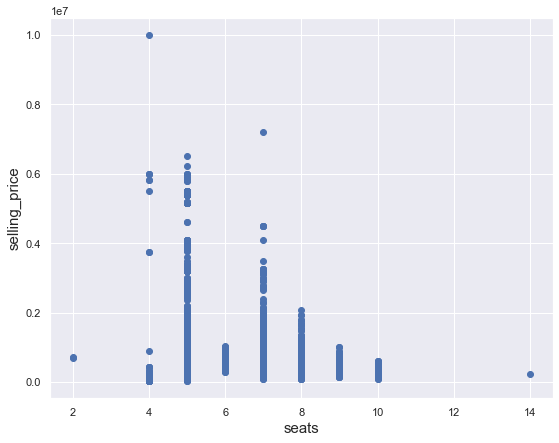

In [21]:
plt.figure(figsize = (9, 7))
plt.scatter(x6, y)
plt.xlabel('seats', fontsize = 15)
plt.ylabel('selling_price', fontsize = 15)
plt.show()

## As we can see, only three independent variables x1, x4 and x5 have a linear relationship with the independent variable (y).

### The second condition in creating a good regression model is that there are no features that cause a bad regression model. This issue can be understood from the value of the coefficient that is calculated for each feature. For example, the characteristic coefficient x5 should be positive, because we know that this characteristic has a positive relationship with the dependent variable (y), that is, the higher the engine power of a car, the higher its price. If the coefficient of this characteristic becomes negative, it means that the model has recognized that this characteristic has an inverse relationship with the dependent variable (y), which is not correct and a bad model is obtained.

In [22]:
x = df[['year', 'engine', 'max_power']]

In [23]:
x.head()

,year,engine,max_power
0,2014,1248.0,74.00
1,2014,1498.0,103.52
2,2006,1497.0,78.00
3,2010,1396.0,90.00
4,2007,1298.0,88.20


In [24]:
x.isnull().sum()

year           0
engine       221
max_power    216
dtype: int64

In [25]:
imputer = SimpleImputer(missing_values = np.nan, strategy = 'median')

In [26]:
x = imputer.fit_transform(x)

In [27]:
x

array([[2014.  , 1248.  ,   74.  ],
       [2014.  , 1498.  ,  103.52],
       [2006.  , 1497.  ,   78.  ],
       ...,
       [2009.  , 1248.  ,   73.9 ],
       [2013.  , 1396.  ,   70.  ],
       [2013.  , 1396.  ,   70.  ]])

In [28]:
x = pd.DataFrame(data = x, columns = ['year', 'engine', 'max_power'])

In [29]:
x.head()

,year,engine,max_power
0,2014.0,1248.0,74.00
1,2014.0,1498.0,103.52
2,2006.0,1497.0,78.00
3,2010.0,1396.0,90.00
4,2007.0,1298.0,88.20


In [30]:
x.apply(pd.isnull).sum()

year         0
engine       0
max_power    0
dtype: int64

In [31]:
x1 = sm.add_constant(x)
model = sm.OLS(y, x1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          selling_price   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                     4530.
Date:                Tue, 10 Sep 2024   Prob (F-statistic):               0.00
Time:                        07:52:58   Log-Likelihood:            -1.1808e+05
No. Observations:                8128   AIC:                         2.362e+05
Df Residuals:                    8124   BIC:                         2.362e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.009e+08   2.84e+06    -35.552      0.000   -1.06e+08   -9.54e+07
year        4.975e+04   1410.606     35.272      0.000     4.7e+04    5.25e+04
engine      -119.8707     15.703     -7.634      0.000    -150.652     -89.089
max_power   1.696e+04    226.796     74.762      0.000    1.65e+04    1.74e+04
==============================================================================
Omnibus:                     4908.807   Durbin-Watson:                   1.551
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            81273.792
Skew:                           2.594   Prob(JB):                         0.00
Kurtosis:                      17.597   Cond. No.                     1.30e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### As can be seen from the coefficient of the independent variable x4, this variable creates a bad regression model.

## In the scatter diagram of x1 and x5 features, we can see that the data is hetroscedasticity. To create a suitable regression model, the data must be homoscedasticity. For this, we must take the logarithm of the available variables.

In [32]:
x_n = x[['year', 'max_power']]

In [33]:
x_n1 = sm.add_constant(x_n)
model2 = sm.OLS(y, x_n1).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          selling_price   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     6718.
Date:                Tue, 10 Sep 2024   Prob (F-statistic):               0.00
Time:                        07:52:58   Log-Likelihood:            -1.1811e+05
No. Observations:                8128   AIC:                         2.362e+05
Df Residuals:                    8125   BIC:                         2.362e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.048e+08    2.8e+06    -37.401      0.000    -1.1e+08   -9.93e+07
year        5.166e+04   1393.330     37.074      0.000    4.89e+04    5.44e+04
max_power   1.572e+04    159.286     98.684      0.000    1.54e+04     1.6e+04
==============================================================================
Omnibus:                     5087.257   Durbin-Watson:                   1.542
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            90586.875
Skew:                           2.701   Prob(JB):                         0.00
Kurtosis:                      18.437   Cond. No.                     1.03e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.03e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### As it is known, removing the independent variable x4 did not reduce the R-squared criterion and the value of the F-statistic criterion was lower. The higher the value of the F-statistic criterion, the higher the probability that the hypothesis H0: B1 = B2 = ... = Bk = 0 is not violated, and the higher this probability, the worse a regression model is. Therefore, by removing the x4 variable, the regression model improved.

In [34]:
x_n['log_year'] = np.log(x_n['year'])
x_n['log_max_power'] = np.log(x_n['max_power'])
x_n['log_selling_price'] = np.log(df['selling_price'])

C:\Users\power\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [35]:
x1_l = x_n['log_year']
x5_l = x_n['log_max_power']
y_l = x_n['log_selling_price']

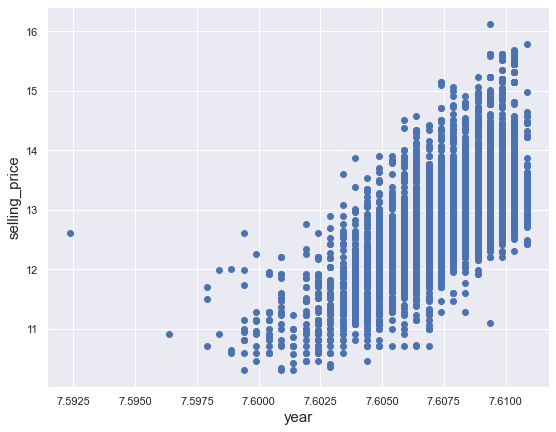

In [36]:
plt.figure(figsize = (9, 7))
plt.scatter(x1_l, y_l)
plt.xlabel('year', fontsize = 15)
plt.ylabel('selling_price', fontsize = 15)
plt.show()

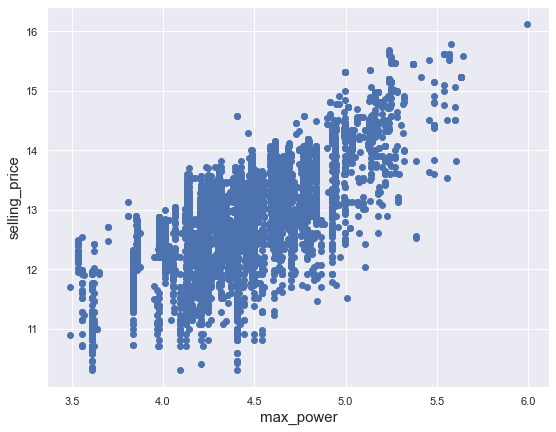

In [37]:
plt.figure(figsize = (9, 7))
plt.scatter(x5_l, y_l)
plt.xlabel('max_power', fontsize = 15)
plt.ylabel('selling_price', fontsize = 15)
plt.show()

In [38]:
x_n['log_year'] = x1_l
x_n['log_max_power'] = x5_l
x_n['log_year'] = y_l

In [39]:
x_n_l = x_n[['log_year', 'log_max_power']]
y_n_l = x_n['log_year']

In [40]:
np.isinf(x_n_l['log_max_power']).sum()

6

In [41]:
x_n_l['log_max_power'] = x_n_l['log_max_power'].replace(-np.inf, np.nan)

C:\Users\power\AppData\Local\Temp\ipykernel_7280\3562615124.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_n_l['log_max_power'] = x_n_l['log_max_power'].replace(-np.inf, np.nan)


In [42]:
np.isinf(x_n_l['log_max_power']).sum()

0

In [43]:
x_n_l = x_n_l.dropna()

In [44]:
np.isinf(x_n_l['log_max_power']).sum()

0

In [45]:
x_s = x_n_l[['log_year', 'log_max_power']]
y_s = x_n_l['log_year']

In [46]:
x_t = sm.add_constant(x_s)
model_t = sm.OLS(y_s, x_t).fit()

In [47]:
model_t.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               log_year   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.540e+31
Date:                Tue, 10 Sep 2024   Prob (F-statistic):               0.00
Time:                        07:53:00   Log-Likelihood:             2.4778e+05
No. Observations:                8122   AIC:                        -4.956e+05
Df Residuals:                    8119   BIC:                        -4.955e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          7.792e-14   2.37e-15     32.858      0.000    7.33e-14    8.26e-14
log_year          1.0000   2.61e-16   3.83e+15      0.000       1.000       1.000
log_max_power  3.461e-16   6.34e-16      0.546      0.585   -8.96e-16    1.59e-15
==============================================================================
Omnibus:                      224.101   Durbin-Watson:                   0.272
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              396.579
Skew:                           0.230   Prob(JB):                     7.65e-87
Kurtosis:                       3.980   Cond. No.                         217.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
yhat = x_s['log_year'] * 1 + x_s['log_max_power'] * 0.0000000000000003461 + 0.00000000000007792

In [49]:
yhat_s = []
for i in yhat:
    yhat_s.append(math.exp(i))

In [50]:
yhat_s[:10]

[450000.0000000363,
 370000.0000000297,
 158000.00000001275,
 225000.00000001813,
 130000.00000001045,
 440000.0000000349,
 96000.00000000764,
 45000.00000000358,
 350000.00000002806,
 200000.00000001604]

In [51]:
df['selling_price'][:10]

0    450000
1    370000
2    158000
3    225000
4    130000
5    440000
6     96000
7     45000
8    350000
9    200000
Name: selling_price, dtype: int64

In [52]:
x_n_l

,log_year,log_max_power
0,13.017003,4.304065
1,12.821258,4.639765
2,11.970350,4.356709
3,12.323856,4.499810
4,11.775290,4.479607
...,...,...
8123,12.676076,4.417032
8124,11.813030,4.700480
8125,12.853176,4.302713
8126,12.577636,4.248495


In [53]:
x_t

,const,log_year,log_max_power
0,1.0,13.017003,4.304065
1,1.0,12.821258,4.639765
2,1.0,11.970350,4.356709
3,1.0,12.323856,4.499810
4,1.0,11.775290,4.479607
...,...,...,...
8123,1.0,12.676076,4.417032
8124,1.0,11.813030,4.700480
8125,1.0,12.853176,4.302713
8126,1.0,12.577636,4.248495


In [54]:
x_n

,year,max_power,log_year,log_max_power,log_selling_price
0,2014.0,74.00,13.017003,4.304065,13.017003
1,2014.0,103.52,12.821258,4.639765,12.821258
2,2006.0,78.00,11.970350,4.356709,11.970350
3,2010.0,90.00,12.323856,4.499810,12.323856
4,2007.0,88.20,11.775290,4.479607,11.775290
...,...,...,...,...,...
8123,2013.0,82.85,12.676076,4.417032,12.676076
8124,2007.0,110.00,11.813030,4.700480,11.813030
8125,2009.0,73.90,12.853176,4.302713,12.853176
8126,2013.0,70.00,12.577636,4.248495,12.577636
